<a href="https://colab.research.google.com/github/clzndyal1/git_test/blob/master/16_Deep_Learning_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical  #one-hot encoding과 같은 결과 반환


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [44]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [45]:
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [46]:
print('학습셋 이미지 수 : %d개'% (X_train.shape[0]))
print('테스트셋 이미지 수 : %d개'% (X_test.shape[0]))

학습셋 이미지 수 : 60000개
테스트셋 이미지 수 : 10000개


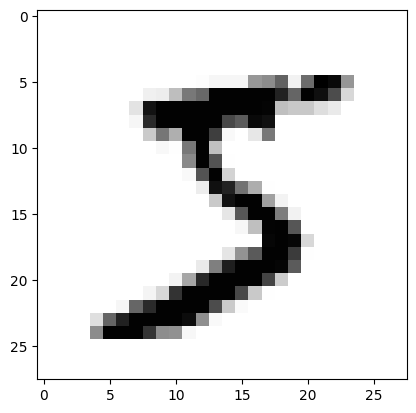

In [47]:
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [48]:
#처음에 나오는 이미지의 자료를 화면에 출력

for x in X_train[0]:
  for i in x:
    print(f'{i:3d}', end='')
  print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [49]:
#데이터 차원 변경
#데이터 정규화

X_train = X_train.reshape(X_train.shape[0], 784)   #X_train.shape[0] -> 갯수  (28 * 28 = 784)

print(X_train.shape)  #60000 *784
# X_train = X_train.astype('float64')
# X_train = X_train / 255

(60000, 784)


In [50]:
# X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255
X_test = X_test.reshape(X_test.shape[0], 784)
print(X_test.shape)

(10000, 784)


In [51]:
#데이터 정규화

X_train = X_train.astype('float64') / 255
X_test = X_test.astype('float64') / 255

# X_train = X_train.reshape(X_test.shape[0], 784).astype('float64') / 255
# X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [52]:
#y값의 클래스를 확인
print('class : ', y_train[0])

print(y_train[:10])  #카테고리 데이터로 변경

y_train = to_categorical(y_train, 10)
y_train[:10]

class :  5
[5 0 4 1 9 2 1 3 1 4]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [54]:
#지금까지의 과정을 하나로 생성

#1. mnist 데이터를 train과 test데이터로 load함
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('학습셋 이미지 수: %d개'% (X_train.shape[0]))
print('테스트셋 이미지 수: %d개'% (X_test.shape[0]))

#2. X_train과 x_test의 데이터를 차원 변경 후 정규화
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

#3. y의 값을 분류 데이터로 변환  -> one-hot encoding,  to_categorical(클래스, 클래스갯수)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

학습셋 이미지 수: 60000개
테스트셋 이미지 수: 10000개


In [61]:
#딥러닝 모델 실행

model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#model 최적화를 위한 설정
model_path='./data/model/MNIST_MLP.hdf5'
checkpointer = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
hist = model.fit(X_train, y_train, epochs=2000, validation_split=0.25, batch_size=200, verbose=0,
                 callbacks=[early_stopping, checkpointer])

#테스트 정확도 출력
print('Test accuracy : ', model.evaluate(X_test, y_test)[1])


Epoch 1: val_loss improved from inf to 0.18253, saving model to ./data/model/MNIST_MLP.hdf5

Epoch 2: val_loss improved from 0.18253 to 0.13625, saving model to ./data/model/MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.13625 to 0.11513, saving model to ./data/model/MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.11513 to 0.09657, saving model to ./data/model/MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.09657 to 0.09211, saving model to ./data/model/MNIST_MLP.hdf5

Epoch 6: val_loss improved from 0.09211 to 0.08848, saving model to ./data/model/MNIST_MLP.hdf5

Epoch 7: val_loss improved from 0.08848 to 0.08489, saving model to ./data/model/MNIST_MLP.hdf5

Epoch 8: val_loss did not improve from 0.08489

Epoch 9: val_loss improved from 0.08489 to 0.08465, saving model to ./data/model/MNIST_MLP.hdf5

Epoch 10: val_loss improved from 0.08465 to 0.08131, saving model to ./data/model/MNIST_MLP.hdf5

Epoch 11: val_loss did not improve from 0.08131

Epoch 12: val_loss did not impro

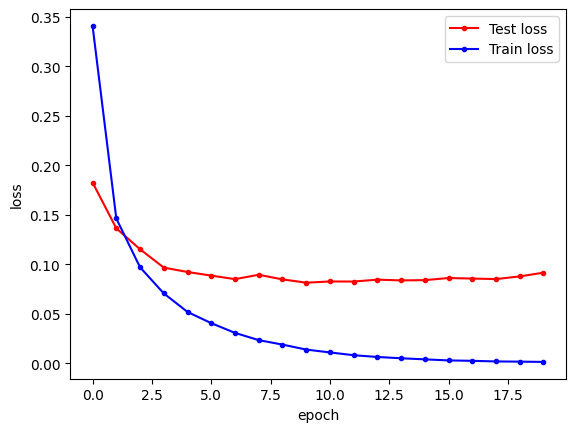

In [62]:
#실행된 결과를 그래프로 표현

y_vloss = hist.history['val_loss']   #검증된 자료의 오차
y_loss = hist.history['loss']    #학습셋의 오차

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='r', label='Test loss')
plt.plot(x_len, y_loss, marker='.', c='b', label='Train loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()